In [25]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.preprocessing import scale

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from PIL import Image
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

from matplotlib import pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import xgboost as xgb

import io
import imageio
from scipy import misc

%matplotlib inline

In [5]:
database = pd.read_csv("data.csv", sep=';')
database.head()

,MUSK,2,3,4,5,6,7,8,9,10,...,159,160,161,162,163,164,165,166,167,168
0,MUSK,46,-108,-60,-69,-117,49,38,-161,-8,...,-308,52,-7,39,126,156,-50,-112,96,1.0
1,MUSK,41,-188,-145,22,-117,-6,57,-171,-39,...,-59,-2,52,103,136,169,-61,-136,79,1.0
2,MUSK,46,-194,-145,28,-117,73,57,-168,-39,...,-134,-154,57,143,142,165,-67,-145,39,1.0
3,MUSK,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,136,168,-60,-135,80,1.0
4,MUSK,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,137,168,-60,-135,80,1.0


In [6]:
X = database.drop(["MUSK","168"],axis=1)
y = database['168']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10 )

# DECISION TREE

96.51515151515152
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       552
         1.0       0.89      0.90      0.89       108

    accuracy                           0.97       660
   macro avg       0.93      0.94      0.94       660
weighted avg       0.97      0.97      0.97       660

[[540  12]
 [ 11  97]]


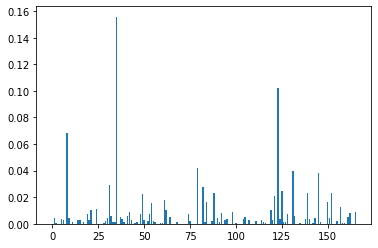

[0.0, 0.0044650277652019685, 0.0005356184083745744, 0.0, 0.0, 0.0037268612358491242, 0.0025274804323046672, 0.0, 0.06824551395722574, 0.00459885110818776, 0.0, 0.0012061373703402723, 0.0, 0.0, 0.0027670210260747406, 0.0028822696158098096, 0.0, 0.001641813163004221, 0.0, 0.007185313101027124, 0.0025510265102415192, 0.010064898173105526, 0.0, 0.0, 0.011439073669861364, 0.0, 0.0, 0.0, 0.00030680995949663173, 0.0022514564246351744, 0.004662184835353743, 0.028846156773825075, 0.005923062286347921, 0.0012305531065819786, 0.0012840826848344428, 0.1558477676424949, 0.0, 0.005493710862458798, 0.003405385638281141, 0.0010391337344470032, 0.0, 0.005896529297421237, 0.008639308952628577, 0.002871474356383424, 0.0, 0.00023948785286083307, 0.0012418365277416738, 0.0, 0.007312016362883858, 0.022696065725650087, 0.0024959584797991773, 0.0, 0.001855595954369649, 0.007600521029098081, 0.015339265179190962, 0.002464109636269723, 0.0011690254512528792, 0.0, 0.0, 0.0009741878760440657, 0.000974187876044065

In [7]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score= accuracy_score(y_test, y_pred) * 100
print(score)
report_dt=classification_report(y_test, y_pred)
print(report_dt)
print(confusion_matrix(y_test,y_pred))
pyplot.bar(range(len(dt.feature_importances_)), dt.feature_importances_)
pyplot.show()
print(list(dt.feature_importances_))


# LOGISTIC REGRESSION


In [8]:
logreg=LogisticRegression(solver='liblinear',multi_class='ovr')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
score= accuracy_score(y_test, y_pred) * 100
print(score)
report_logreg=classification_report(y_test, y_pred)
print(report_logreg)
print(confusion_matrix(y_test,y_pred))
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

96.21212121212122
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       552
         1.0       0.93      0.83      0.88       108

    accuracy                           0.96       660
   macro avg       0.95      0.91      0.93       660
weighted avg       0.96      0.96      0.96       660

[[545   7]
 [ 18  90]]
Optimization terminated successfully.
         Current function value: 0.109863
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                    168   No. Observations:                 6599
Model:                          Logit   Df Residuals:                     6433
Method:                           MLE   Df Model:                          165
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.7444
Time:                        19:39:48   Log-Likelihood:                -724.99
converged:                       True   LL-Null:       

# RANDOM FOREST

In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score= accuracy_score(y_test, y_pred) * 100
print(score)
report_rf=classification_report(y_test, y_pred)
print(report_rf)
print(confusion_matrix(y_test,y_pred))


98.33333333333333
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       552
         1.0       1.00      0.90      0.95       108

    accuracy                           0.98       660
   macro avg       0.99      0.95      0.97       660
weighted avg       0.98      0.98      0.98       660

[[552   0]
 [ 11  97]]


# SVM

In [10]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score= accuracy_score(y_test, y_pred) * 100
print(score)
report_svm=classification_report(y_test, y_pred)
print(report_svm)
print(confusion_matrix(y_test,y_pred))

90.6060606060606
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       552
         1.0       1.00      0.43      0.60       108

    accuracy                           0.91       660
   macro avg       0.95      0.71      0.77       660
weighted avg       0.92      0.91      0.89       660

[[552   0]
 [ 62  46]]


# XGBOOST

In [24]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
score= accuracy_score(y_test, y_pred,) * 100
print(score)
report_xgb=classification_report(y_test, y_pred)
print(report_xgb)
print(confusion_matrix(y_test,y_pred))

96.81818181818181
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       552
         1.0       0.96      0.84      0.90       108

    accuracy                           0.97       660
   macro avg       0.96      0.92      0.94       660
weighted avg       0.97      0.97      0.97       660

[[548   4]
 [ 17  91]]


# CROSS VALIDATIONS / 10 - FOLD

In [27]:
from sklearn.model_selection import cross_val_score
print("DECISION_TREE:" ,cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring ="accuracy").mean())
print("LOGISTIC_REGRESSION:" ,cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=10, scoring = "accuracy").mean())
print("SUPPORT_VECTOR_MACHINES:" ,cross_val_score(SVC(gamma='auto'), X, y, cv=10, scoring ="accuracy").mean())
print("RANDOM_FOREST:" ,cross_val_score(RandomForestClassifier(n_estimators=40), X, y, cv=10, scoring ="accuracy").mean())
print("XGBOOST:" ,cross_val_score(xgb.XGBClassifier(), X, y, cv=10, scoring ="accuracy").mean())


DECISION_TREE: 0.8051413988136294
LOGISTIC_REGRESSION: 0.8107442405849083
SUPPORT_VECTOR_MACHINES: 0.8498252632547019
RANDOM_FOREST: 0.7809054122407689
XGBOOST: 0.8219545224628686
